In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [84]:
df= pd.read_csv('train.csv')
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [85]:
df[df.duplicated()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

# X y Split

In [87]:
X= df[[i for i in df.columns if i != 'credit_card_default']]
y= df['credit_card_default']

In [88]:
print(X.shape)
print(y.shape)

(45528, 18)
(45528,)


In [89]:
X.drop(labels= ['customer_id', 'name'], axis= 1, inplace= True)

# Making all as numerical variables

In [90]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0


In [91]:
X['gender'] = X['gender'].apply(lambda x: 1 if x== 'M' else 0)
X['owns_car'] = X['owns_car'].apply(lambda x: 1 if 'Y' else 0)
X['owns_house'] = X['owns_house'].apply(lambda x: 1 if 'Y' else 0)

In [92]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,0,1,1,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1
1,29,1,1,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0
2,37,1,1,1,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0
3,39,0,1,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0


## Dummies for occupation_type

In [93]:
X= pd.concat([X, pd.get_dummies(df['occupation_type'], drop_first= True, prefix= 'occ_')], axis= 1)

In [94]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,...,occ__Low-skill Laborers,occ__Managers,occ__Medicine staff,occ__Private service staff,occ__Realty agents,occ__Sales staff,occ__Secretaries,occ__Security staff,occ__Unknown,occ__Waiters/barmen staff
0,46,0,1,1,0.0,107934.04,612.0,Unknown,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,29,1,1,1,0.0,109862.62,2771.0,Laborers,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1,1,0.0,230153.17,204.0,Laborers,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,39,0,1,1,0.0,122325.82,11941.0,Core staff,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,Core staff,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X.drop(labels= 'occupation_type', axis= 1, inplace = True)

In [96]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,...,occ__Low-skill Laborers,occ__Managers,occ__Medicine staff,occ__Private service staff,occ__Realty agents,occ__Sales staff,occ__Secretaries,occ__Security staff,occ__Unknown,occ__Waiters/barmen staff
0,46,0,1,1,0.0,107934.04,612.0,1.0,1.0,33070.28,...,0,0,0,0,0,0,0,0,1,0
1,29,1,1,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1,1,0.0,230153.17,204.0,2.0,0.0,48416.60,...,0,0,0,0,0,0,0,0,0,0
3,39,0,1,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,...,0,0,0,0,0,0,0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.7, random_state= 100)

In [99]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (31869, 33)
y_train shape:  (31869,)
X_test shape:  (13659, 33)
y_test shape:  (13659,)


# XGBoost on Train Set

In [115]:
import xgboost

In [116]:
xg_cla= xgboost.XGBClassifier()

In [187]:
# xg_cla.fit(X_train, y_train, eval_metric= 'error', eval_set=[(X_train, y_train)], verbose= True)

xg_cla.fit(X_train, y_train, eval_metric= 'error', eval_set=[(X_test, y_test)], verbose= True)

[0]	validation_0-error:0.02116
[1]	validation_0-error:0.02101
[2]	validation_0-error:0.02057
[3]	validation_0-error:0.02087
[4]	validation_0-error:0.02079
[5]	validation_0-error:0.02072
[6]	validation_0-error:0.02108
[7]	validation_0-error:0.02050
[8]	validation_0-error:0.02057
[9]	validation_0-error:0.02116
[10]	validation_0-error:0.02101
[11]	validation_0-error:0.02101
[12]	validation_0-error:0.02116
[13]	validation_0-error:0.02108
[14]	validation_0-error:0.02101
[15]	validation_0-error:0.02108
[16]	validation_0-error:0.02108
[17]	validation_0-error:0.02131
[18]	validation_0-error:0.02131
[19]	validation_0-error:0.02123
[20]	validation_0-error:0.02108
[21]	validation_0-error:0.02108
[22]	validation_0-error:0.02108
[23]	validation_0-error:0.02116
[24]	validation_0-error:0.02094
[25]	validation_0-error:0.02108
[26]	validation_0-error:0.02108
[27]	validation_0-error:0.02094
[28]	validation_0-error:0.02101
[29]	validation_0-error:0.02079
[30]	validation_0-error:0.02079
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_cla.fit(X_train, 
          y_train, 
          eval_metric="error", 
          eval_set=eval_set, 
          verbose=False)
results = xg_cla.evals_result()

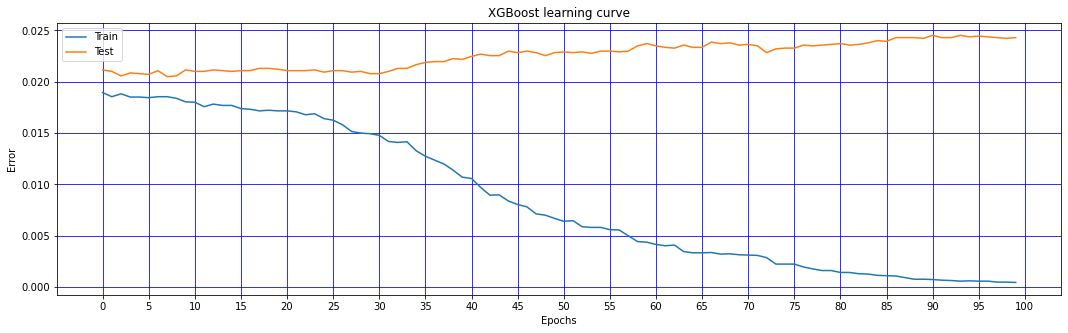

In [189]:
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize= (18, 5))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
ax.set_xticks(np.arange(0, 101, 5))
ax.grid(b= True, which = 'major', color= 'b', linestyle= '-')
ax.grid(b= True, which = 'minor', color= 'r', linestyle= '--')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('XGBoost learning curve')
plt.show()

7 epochs seems to be least error for test

Hence, using early_stopping_rounds to limit the algorithm to 7 epochs

In [190]:
proposed_model= xgboost.XGBRFClassifier()
proposed_model.fit(X_train, y_train, early_stopping_rounds=7, eval_set= [(X_test, y_test)], eval_metric= 'error', verbose= True)

[0]	validation_0-error:0.02043


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

## Making Predictions on train set

In [191]:
y_train_pred= proposed_model.predict(X_train)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
sum(y_train)

2567

In [193]:
sum(y_train_pred)

1959

In [194]:
print('Overall Train Accuracy: ', sum(y_train_pred)/sum(y_train) )

Overall Train Accuracy:  0.7631476431632256


# Test Set

In [195]:
X_test.columns== X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

## Predicting on X_test

In [196]:
y_test_pred= proposed_model.predict(X_test)

In [197]:
print(sum(y_test_pred))
print(sum(y_test))

855
1130


In [198]:
print('Overall Test Accuracy: ', sum(y_test_pred)/sum(y_test) )

Overall Test Accuracy:  0.7566371681415929


# Working on real test set as df_test

In [199]:
df_test= pd.read_csv('test.csv')
df_test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [200]:
df_test_ml= df_test.copy(deep= True)

In [201]:
df_test_ml.drop(labels= ['customer_id','name'], axis= 1, inplace= True)

# Converting features to numeric

In [202]:
df_test_ml['gender'] = df_test_ml['gender'].apply(lambda x: 1 if x== 'M' else 0)
df_test_ml['owns_car'] = df_test_ml['owns_car'].apply(lambda x: 1 if 'Y' else 0)
df_test_ml['owns_house'] = df_test_ml['owns_house'].apply(lambda x: 1 if 'Y' else 0)

# Dummies for occupation type

In [203]:
df_test_ml= pd.concat([df_test_ml, pd.get_dummies(df_test_ml['occupation_type'], 
                                                  drop_first= True, prefix= 'occ_')], axis= 1)

In [204]:
df_test_ml.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,...,occ__Low-skill Laborers,occ__Managers,occ__Medicine staff,occ__Private service staff,occ__Realty agents,occ__Sales staff,occ__Secretaries,occ__Security staff,occ__Unknown,occ__Waiters/barmen staff
0,52,0,1,1,0.0,232640.53,998.0,Unknown,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,48,0,1,1,1.0,284396.79,1338.0,Unknown,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,50,0,1,1,1.0,149419.28,1210.0,Unknown,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,30,0,1,1,1.0,160437.54,503.0,Laborers,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,52,1,1,1,0.0,233480.37,157.0,Laborers,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df_test_ml.drop(labels= 'occupation_type', axis= 1, inplace= True)

In [206]:
df_test_ml.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,...,occ__Low-skill Laborers,occ__Managers,occ__Medicine staff,occ__Private service staff,occ__Realty agents,occ__Sales staff,occ__Secretaries,occ__Security staff,occ__Unknown,occ__Waiters/barmen staff
0,52,0,1,1,0.0,232640.53,998.0,2.0,0.0,14406.73,...,0,0,0,0,0,0,0,0,1,0
1,48,0,1,1,1.0,284396.79,1338.0,3.0,0.0,57479.99,...,0,0,0,0,0,0,0,0,1,0
2,50,0,1,1,1.0,149419.28,1210.0,3.0,0.0,21611.01,...,0,0,0,0,0,0,0,0,1,0
3,30,0,1,1,1.0,160437.54,503.0,2.0,1.0,28990.76,...,0,0,0,0,0,0,0,0,0,0
4,52,1,1,1,0.0,233480.37,157.0,2.0,1.0,54213.72,...,0,0,0,0,0,0,0,0,0,0


## Applying Model

In [207]:
result= proposed_model.predict(df_test_ml)

In [208]:
len(result)

11383

In [209]:
sum(result)

653

In [210]:
final_result= pd.DataFrame()
final_result= pd.concat([final_result, df_test['customer_id']])
final_result['credit_card_default']= result
final_result.columns= ['customer_id', 'credit_card_default']
final_result

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1
...,...,...
11378,CST_142412,0
11379,CST_107967,0
11380,CST_134002,0
11381,CST_146856,0


In [211]:
final_result.to_csv('submission_file.csv')